# Homework 4 (due 20th July, 11:59 PM)

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class.
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function.
4.  Using plot_2d_examples function, evaluate different SVM classifiers with polynomial kernels of varying degrees. Also, try several $C$ values.





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
import pandas as pd

In [2]:
# loaded iris dataset
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
# Considered the values of the two features petal length and petal width columns only as X.
X = df.iloc[:, [2,3]].values
# Here we are appending the value of Virginica to be 1 and all other classes will be 0. So now our dataset will be a two-class dataset
y = (data.target == 2).astype(int)

In [3]:
Iris_df = (X, y)
toy_datasets = [Iris_df]

Now, the dataset converted into list is ready to be fed to the plot_2d_examples function

In [4]:

def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings, with the name we should use for each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.6)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

* Below, I have considered different SVM classifiers with polynomial kernels of varying degrees and 𝐶 (regularization parameter) values. I have considered polynomial, linear, and rbf classifiers with different (degree, C) pairs. According to the score (5, 10) pair produced better result without overfitting or underfitting. The data is classified on the basis of classes by a margin and fits the data with less error i.e with less data misclassification.

* Also odd values of the degree and C values of 1.0 and 10.0 look reasonable as they are fitting the data with less error.The value of 100 and after it, the data is getting overfitted which is increasing the data misclassifications.

* We can also see that for the linear classification with C values of 1 and 10, the data is classified with minute differences only. The test score of 9.8 present on all the linear clssified images shows that the data is classified for all (degree, C) pairs in the same way.

* Again for the rbf and polynomial classification there are few differences in the classifications when the (degree, C) pairs are changed. The data is being overfitted or underfitted for some of the (degree, C) values.

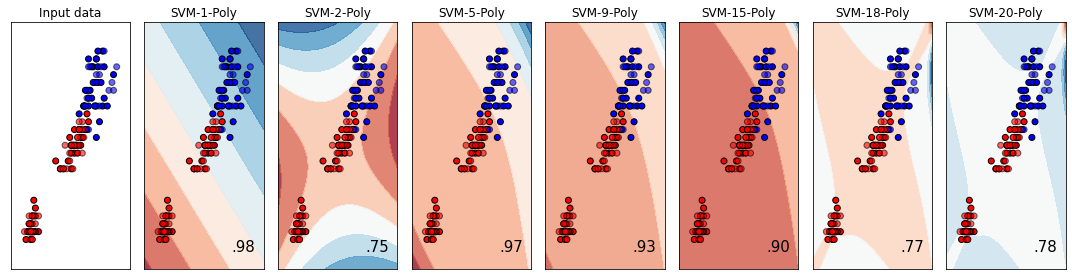

In [5]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', C=1.0))
  names.append("SVM-"+str(i)+"-Poly")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

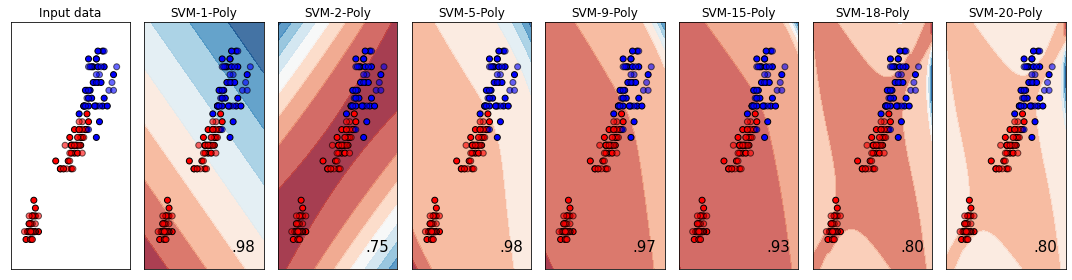

In [6]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', C=10.0))
  names.append("SVM-"+str(i)+"-Poly")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

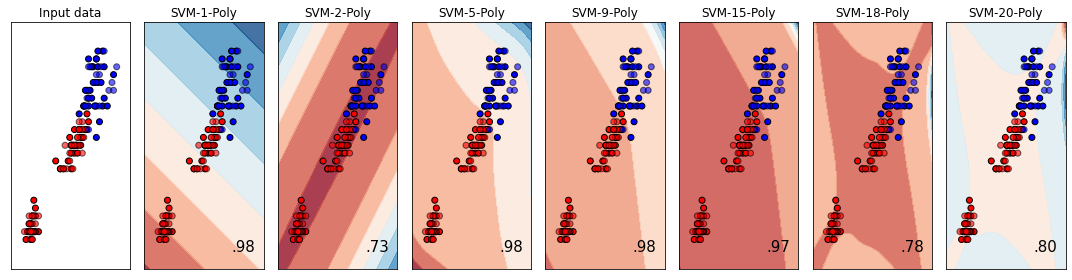

In [7]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', C=100.0))
  names.append("SVM-"+str(i)+"-Poly")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

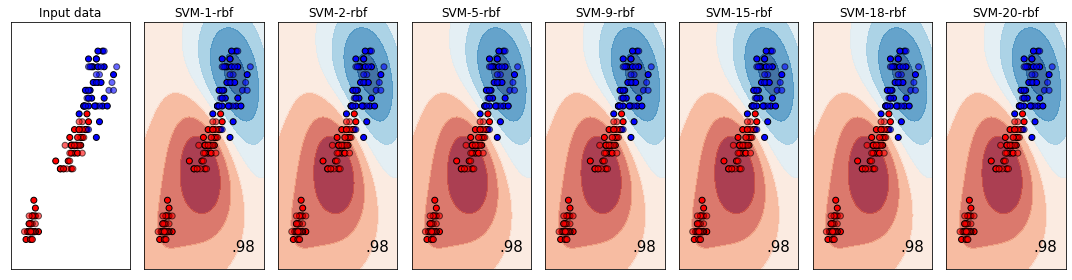

In [8]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='rbf', degree=i, gamma='scale', C=1.0))
  names.append("SVM-"+str(i)+"-rbf")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

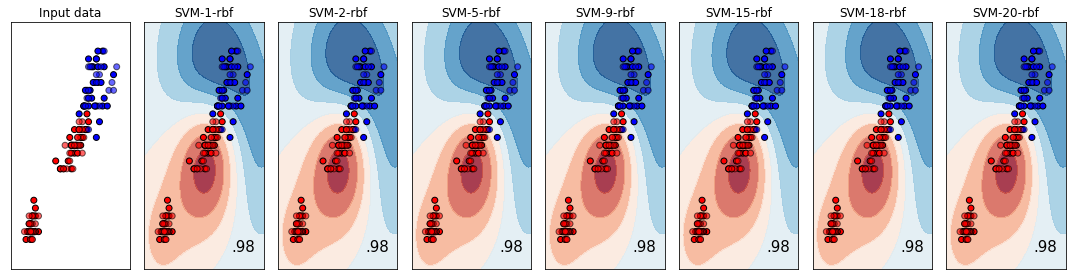

In [9]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='rbf', degree=i, gamma='scale', C=10.0))
  names.append("SVM-"+str(i)+"-rbf")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

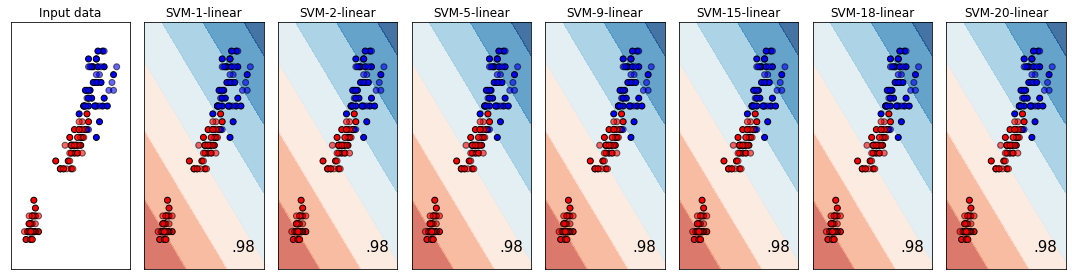

In [10]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='linear', degree=i, gamma='scale', C=1.0))
  names.append("SVM-"+str(i)+"-linear")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

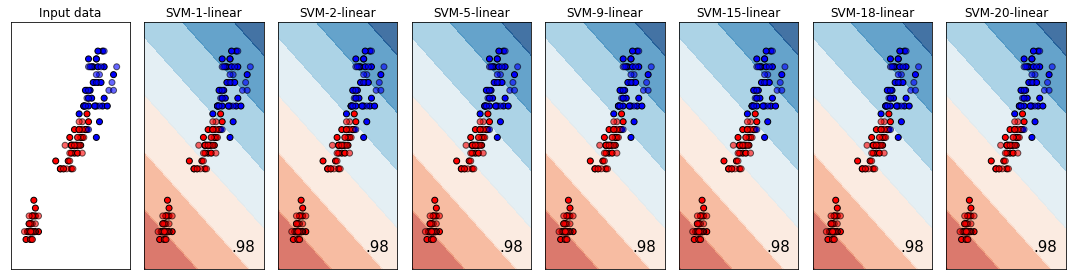

In [11]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='linear', degree=i, gamma='scale', C=10.0))
  names.append("SVM-"+str(i)+"-linear")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

In [12]:
def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

dX_train, dX_test, dy_train, dy_test = create_splits(X, y)

print(f'Training sample: {dX_train.shape[0]:,}')
print(f'Test sample: {dX_test.shape[0]:,}')

Training sample: 120
Test sample: 30


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

svm_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', SVC())])

param_grid = [
  {'model__C': [0.01, 0.1, 1, 10, 100, 1000], 'model__kernel': ['poly','linear','rbf']}

 ]

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
svm_results = svm_results.fit(dX_train, dy_train)

In [14]:
svm_score = svm_results.score(dX_test, dy_test)
print(f'Support Vector Machine Score: {svm_score:.2%}')

Support Vector Machine Score: 93.33%


In [15]:
print('\n Best params: ', svm_results.best_params_)
svm_results.best_estimator_


 Best params:  {'model__C': 1000, 'model__kernel': 'poly'}


Pipeline(steps=[('scaling', StandardScaler()),
                ('model', SVC(C=1000, kernel='poly'))])

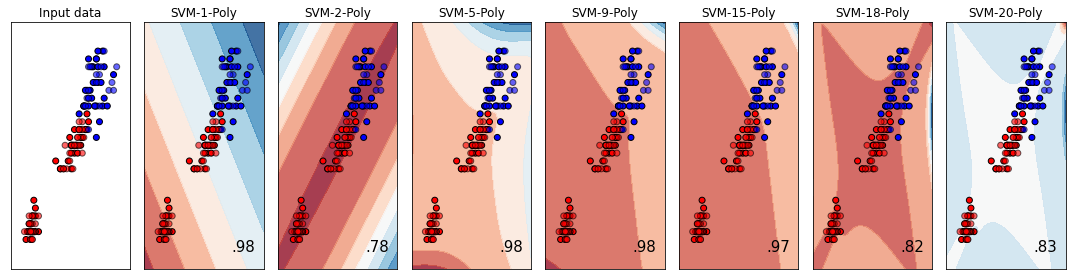

In [16]:
classifiers = []
names = []

for i in [1, 2, 5, 9, 15, 18, 20]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', C=1000))
  names.append("SVM-"+str(i)+"-Poly")

plot_2d_examples(classifiers, names, toy_datasets, figsize=(15,2*2))

According to the svm_results.best_estimator_ results we got C=1000 and polynomial kernal as the best parameters to classify the data and we can also see in the image that the data is classified without any overfitting or underfitting.